In [1]:
# p43 (p64 PDF) 

%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

c:\Users\duyni\miniconda3\envs\qiskit_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
# p411 (p432 PDF)

# Set our secret string to ‘011’
shh = '011'

# Creating registers
# Set the input qubit register size equal to the length of s
input_qubits = len(str(shh))
# Set the total qubits equal to twice the size of input qubits
total_qubits = 2*input_qubits

# Create the quantum circuit
qc = QuantumCircuit(total_qubits)


In [3]:
# p412 (p433 PDF)

# Apply Hadamard gates before querying the oracle
qc.h(range(input_qubits)) 
qc.barrier()
qc.draw()


┌───┐ ░ 
q_0: ┤ H ├─░─
     ├───┤ ░ 
q_1: ┤ H ├─░─
     ├───┤ ░ 
q_2: ┤ H ├─░─
     └───┘ ░ 
q_3: ──────░─
           ░ 
q_4: ──────░─
           ░ 
q_5: ──────░─
           ░

In [4]:
# p412 (p433 PDF)

# Create the oracle function of our secret string 
# Since we are only setting the last two qubits, 
# we will only apply cx gates to the last two. 
for idx in range(input_qubits):
    if(shh[idx] == '1'):
        for count in range(input_qubits):
            qc.cx(idx, input_qubits + count)

qc.barrier()
qc.draw()


┌───┐ ░                                ░ 
q_0: ┤ H ├─░────────────────────────────────░─
     ├───┤ ░                                ░ 
q_1: ┤ H ├─░───■────■─────────■─────────────░─
     ├───┤ ░   │    │         │             ░ 
q_2: ┤ H ├─░───┼────┼────■────┼────■────■───░─
     └───┘ ░ ┌─┴─┐  │  ┌─┴─┐  │    │    │   ░ 
q_3: ──────░─┤ X ├──┼──┤ X ├──┼────┼────┼───░─
           ░ └───┘┌─┴─┐└───┘  │  ┌─┴─┐  │   ░ 
q_4: ──────░──────┤ X ├───────┼──┤ X ├──┼───░─
           ░      └───┘     ┌─┴─┐└───┘┌─┴─┐ ░ 
q_5: ──────░────────────────┤ X ├─────┤ X ├─░─
           ░                └───┘     └───┘ ░

In [7]:
# p413 (p434 PDF)

# Apply Hadamard gates to the input register
qc.h(range(len(str(shh))))

# Measure ancilla qubits
qc.measure_all()
qc.draw()

┌───┐ ░                                ░ ┌───┐ ░ ┌─┐               
   q_0: ┤ H ├─░────────────────────────────────░─┤ H ├─░─┤M├───────────────
        ├───┤ ░                                ░ ├───┤ ░ └╥┘┌─┐            
   q_1: ┤ H ├─░───■────■─────────■─────────────░─┤ H ├─░──╫─┤M├────────────
        ├───┤ ░   │    │         │             ░ ├───┤ ░  ║ └╥┘┌─┐         
   q_2: ┤ H ├─░───┼────┼────■────┼────■────■───░─┤ H ├─░──╫──╫─┤M├─────────
        └───┘ ░ ┌─┴─┐  │  ┌─┴─┐  │    │    │   ░ └───┘ ░  ║  ║ └╥┘┌─┐      
   q_3: ──────░─┤ X ├──┼──┤ X ├──┼────┼────┼───░───────░──╫──╫──╫─┤M├──────
              ░ └───┘┌─┴─┐└───┘  │  ┌─┴─┐  │   ░       ░  ║  ║  ║ └╥┘┌─┐   
   q_4: ──────░──────┤ X ├───────┼──┤ X ├──┼───░───────░──╫──╫──╫──╫─┤M├───
              ░      └───┘     ┌─┴─┐└───┘┌─┴─┐ ░       ░  ║  ║  ║  ║ └╥┘┌─┐
   q_5: ──────░────────────────┤ X ├─────┤ X ├─░───────░──╫──╫──╫──╫──╫─┤M├
              ░                └───┘     └───┘ ░       ░  ║  ║  ║  ║  ║ └╥┘
meas: 6/══════════════════════════════════════════════════╩══╩══╩══╩══╩══╩═
                                                          0  1  2  3  4  5

In [8]:
# p414 (p435 PDF)

# Execute the quantum circuit on the simulator
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
counts = results.get_counts(qc)

# Print results
print('Counts: ', counts)


Counts:  {'000000': 249, '111000': 252, '111110': 276, '000110': 247}


sub results {'000': 501, '110': 523}


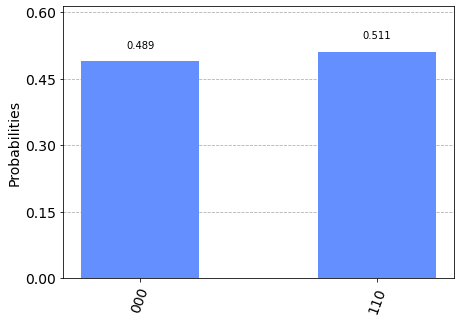

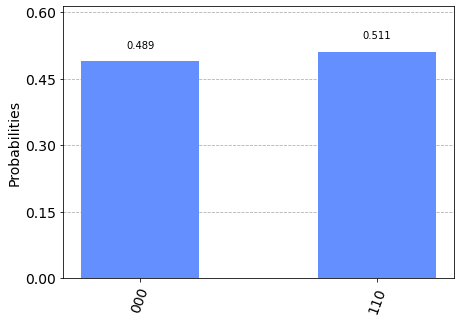

In [10]:
# p414 (p435 PDF)

# Create a new object to store the input register counts
sub_results = {}
# Loop through each of the count keys and extract the 
# the input register and their respective counts. 
for count in counts.keys():
    # rev_count_key = count[::-1]
    input_count = count[input_qubits:]
    count_value = counts[count]
    if input_count in sub_results:
        sub_results[input_count] += count_value
    else:
        sub_results[input_count] = count_value

# Print and plot the results
print('sub results', sub_results)
plot_histogram(sub_results)


In [11]:
# p417 (p438 PDF)

# Initialize the 3-qubit quantum circuit
# Set the state '110'
s = '110'
num_qubits = len(s)
qc = QuantumCircuit(num_qubits)

In [12]:
# p418 (p439 PDF)

# Set reverse ordering
s = s[::-1] 

# Construct the state 110
for idx in range(num_qubits):
    if s[idx] == '1':
        qc.x(idx)    

qc.barrier()
qc.draw()

░ 
q_0: ──────░─
     ┌───┐ ░ 
q_1: ┤ X ├─░─
     ├───┤ ░ 
q_2: ┤ X ├─░─
     └───┘ ░

In [13]:
# p419 (p440 PDF)

# Import the value pi for our rotations
from numpy import pi

# Always start from the most significant qubit, 
# in this case it's q2.
# Step 1, add a Hadamard gate
qc.h(2)


In [14]:
# p419 (p440 PDF)

# Step 2, add CROT gates from most significant qubit 
qc.cu1(pi/2, 1, 2)


In [15]:
# p419 (p440 PDF)

# Step 3, add another CROT from 2 to the next qubit down,
# while doubling the phase denominator
qc.cu1(pi/4, 0, 2)

# Draw the circuit
qc.draw()


░                    
q_0: ──────░──────────────■─────
     ┌───┐ ░              │     
q_1: ┤ X ├─░───────■──────┼─────
     ├───┤ ░ ┌───┐ │pi/2  │pi/4 
q_2: ┤ X ├─░─┤ H ├─■──────■─────
     └───┘ ░ └───┘

In [16]:
# p420 (p441 PDF)

# Now that we finished from 2 down to 0
# We'll drop to the next least significant qubit and start again, 
# Step 1, add a Hadamard gate
qc.h(1)


In [17]:
# p420 (p441 PDF)

# Step 2, add Control Rotation (CROT) gates from most significant towards 
# least significant starting a pi/2, and doubling the denominator 
# as you go down each qubit. 
qc.cu1(pi/2, 0, 1)

# Draw the circuit
qc.draw()


░                                
q_0: ──────░──────────────■───────────■─────
     ┌───┐ ░              │     ┌───┐ │pi/2 
q_1: ┤ X ├─░───────■──────┼─────┤ H ├─■─────
     ├───┤ ░ ┌───┐ │pi/2  │pi/4 └───┘       
q_2: ┤ X ├─░─┤ H ├─■──────■─────────────────
     └───┘ ░ └───┘

In [18]:
# p421 (p442 PDF)

# Step 1, add a Hadamard gate
qc.h(0)
# Since we are at the least significant qubit, we are done!

# Draw the circuit
qc.draw()


░                                ┌───┐
q_0: ──────░──────────────■───────────■─────┤ H ├
     ┌───┐ ░              │     ┌───┐ │pi/2 └───┘
q_1: ┤ X ├─░───────■──────┼─────┤ H ├─■──────────
     ├───┤ ░ ┌───┐ │pi/2  │pi/4 └───┘            
q_2: ┤ X ├─░─┤ H ├─■──────■──────────────────────
     └───┘ ░ └───┘

In [19]:
# p422 (p443 PDF)

# Define a function which will add the swap gates to the outer 
# pair of qubits
def add_swap_gates(qc_swaps, qubits):
    for qubit in range(qubits//2):
        qc_swaps.swap(qubit, qubits-qubit-1)
    return qc_swaps


In [20]:
# p422 (p443 PDF)

qft_circuit = add_swap_gates(qc, num_qubits)
qft_circuit.draw()


░                                ┌───┐   
q_0: ──────░──────────────■───────────■─────┤ H ├─X─
     ┌───┐ ░              │     ┌───┐ │pi/2 └───┘ │ 
q_1: ┤ X ├─░───────■──────┼─────┤ H ├─■───────────┼─
     ├───┤ ░ ┌───┐ │pi/2  │pi/4 └───┘             │ 
q_2: ┤ X ├─░─┤ H ├─■──────■───────────────────────X─
     └───┘ ░ └───┘

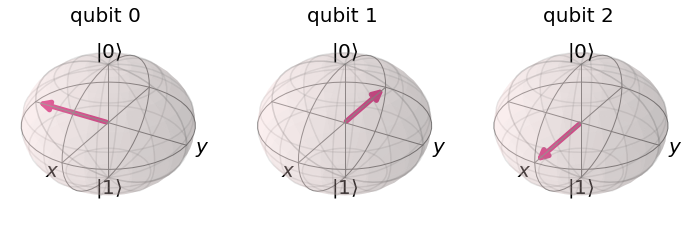

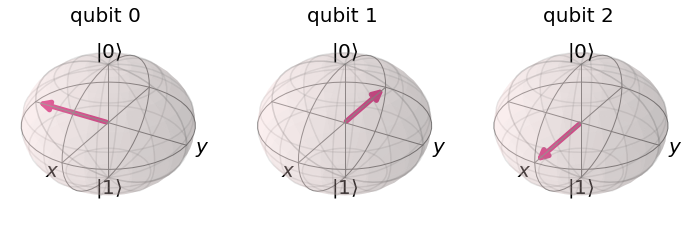

In [21]:
# p423 (p444 PDF)

# Get the state vector simulator to view our final QFT state
backend = Aer.get_backend("statevector_simulator")

# Execute the QFT circuit and visualize the results
statevector = execute(qft_circuit,       
                   backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)


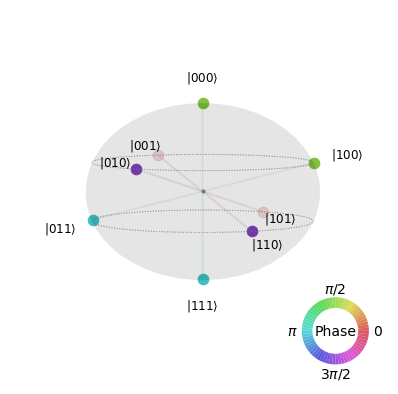

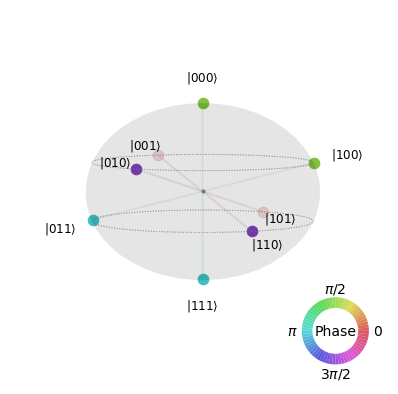

In [22]:
# p423 (p444 PDF)

plot_state_qsphere(statevector)

# Aqua: Shor's algorithm
Running Shor's algorithm to factor two numbers. 

In [23]:
# p426 (p447 PDF)

# Import Shor’s algorithm library
from qiskit.aqua.algorithms import Shor

# Import the QuantumInstance module that will allow us to run the algorithm on a simulator and a quantum computer
from qiskit.aqua import QuantumInstance


In [24]:
# p427 (p448 PDF)

# Declare the product 'N', and our base 'a'
N = 21
a = 3


In [25]:
# p427 (p448 PDF)

# Configure backend simulator parameters
backend = Aer.get_backend('qasm_simulator')
shots = 1024

# Initialize the QuantumInstance object which will execute 
# Shor’s algorithm
qi = QuantumInstance(backend=backend, shots=shots) 


In [26]:
# p427 (p448 PDF)

shors_algorithm = Shor(N=N, a=a, quantum_instance = qi)

# ValueError is expected. Continue running the cells below.

ValueError: The integer a needs to satisfy a < N and gcd(a, N) = 1.

In [27]:
# p428 (p449 PDF)

# Declare the product 'N', and our base 'a'
N = 21
a = 2

In [29]:
# p427 (p448 PDF)

shors_algorithm = Shor(N=N, a=a, quantum_instance = qi)

# Rerun cell to update N and a values

In [30]:
# p428 (p449 PDF)

results = shors_algorithm.run()

In [31]:
# p428 (p449 PDF)

print(results['factors'])

[[3, 7]]


# Grover's Algorithm
Implementing Grover's algorithm

In [32]:
# p433 (p454 PDF)

# Set the state we wish to search 
N = '110'
num_qubits = len(N)

# Create the quantum circuit 
qc = QuantumCircuit(num_qubits)

# Set all qubits in superposition
qc.h(range(num_qubits))
qc.barrier()

#Draw the circuit
qc.draw()


┌───┐ ░ 
q_0: ┤ H ├─░─
     ├───┤ ░ 
q_1: ┤ H ├─░─
     ├───┤ ░ 
q_2: ┤ H ├─░─
     └───┘ ░

In [33]:
# p434 (p455 PDF)

# Reverse the state so it’s in proper qubit ordering
N = N[::-1]

# Encode N into our circuit
for idx in range(num_qubits):
    if N[idx] == '0':
        qc.x(idx)
qc.barrier()

# Draw the circuit
qc.draw()


┌───┐ ░ ┌───┐ ░ 
q_0: ┤ H ├─░─┤ X ├─░─
     ├───┤ ░ └───┘ ░ 
q_1: ┤ H ├─░───────░─
     ├───┤ ░       ░ 
q_2: ┤ H ├─░───────░─
     └───┘ ░       ░

In [34]:
# p434 (p455 PDF)

# Create the Grover oracle for our 3-qubit quantum circuit
qc.h(2)
qc.ccx(0, 1, 2)
qc.h(2)
qc.barrier()

# Draw the circuit
qc.draw()


┌───┐ ░ ┌───┐ ░                 ░ 
q_0: ┤ H ├─░─┤ X ├─░────────■────────░─
     ├───┤ ░ └───┘ ░        │        ░ 
q_1: ┤ H ├─░───────░────────■────────░─
     ├───┤ ░       ░ ┌───┐┌─┴─┐┌───┐ ░ 
q_2: ┤ H ├─░───────░─┤ H ├┤ X ├┤ H ├─░─
     └───┘ ░       ░ └───┘└───┘└───┘ ░

In [35]:
# p435 (p456 PDF)

# Reset the value after the oracle
for idx in range(num_qubits):
    if N[idx] == '0':
        qc.x(idx)
qc.barrier()

# Draw the circuit
qc.draw()


┌───┐ ░ ┌───┐ ░                 ░ ┌───┐ ░ 
q_0: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ 
q_1: ┤ H ├─░───────░────────■────────░───────░─
     ├───┤ ░       ░ ┌───┐┌─┴─┐┌───┐ ░       ░ 
q_2: ┤ H ├─░───────░─┤ H ├┤ X ├┤ H ├─░───────░─
     └───┘ ░       ░ └───┘└───┘└───┘ ░       ░

In [36]:
# p436 (p457 PDF)

# Set all qubits in superposition
qc.h(range(num_qubits))
qc.x(range(num_qubits))
qc.barrier()

# Draw the circuit
qc.draw()


┌───┐ ░ ┌───┐ ░                 ░ ┌───┐ ░ ┌───┐┌───┐ ░ 
q_0: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░─
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ ├───┤├───┤ ░ 
q_1: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░─
     ├───┤ ░       ░ ┌───┐┌─┴─┐┌───┐ ░       ░ ├───┤├───┤ ░ 
q_2: ┤ H ├─░───────░─┤ H ├┤ X ├┤ H ├─░───────░─┤ H ├┤ X ├─░─
     └───┘ ░       ░ └───┘└───┘└───┘ ░       ░ └───┘└───┘ ░

In [37]:
# p436 (p457 PDF)

# Apply another oracle, same as the previous, 
qc.h(2)
qc.ccx(0, 1, 2)
qc.h(2)
qc.barrier()

# Draw the circuit
qc.draw()


┌───┐ ░ ┌───┐ ░                 ░ ┌───┐ ░ ┌───┐┌───┐ ░                 ░ 
q_0: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░────────■────────░─
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ ├───┤├───┤ ░        │        ░ 
q_1: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─
     ├───┤ ░       ░ ┌───┐┌─┴─┐┌───┐ ░       ░ ├───┤├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ 
q_2: ┤ H ├─░───────░─┤ H ├┤ X ├┤ H ├─░───────░─┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─
     └───┘ ░       ░ └───┘└───┘└───┘ ░       ░ └───┘└───┘ ░ └───┘└───┘└───┘ ░

In [38]:
# p437 (p458 PDF)

# Reapply the X rotations on all qubits
qc.x(range(num_qubits))

qc.barrier()

# Reapply Hadamard gates to all qubits
qc.h(range(num_qubits))

# Draw the circuit
qc.draw()


┌───┐ ░ ┌───┐ ░                 ░ ┌───┐ ░ ┌───┐┌───┐ ░                 ░ »
q_0: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ ├───┤├───┤ ░        │        ░ »
q_1: ┤ H ├─░───────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤ ░       ░ ┌───┐┌─┴─┐┌───┐ ░       ░ ├───┤├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ »
q_2: ┤ H ├─░───────░─┤ H ├┤ X ├┤ H ├─░───────░─┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─»
     └───┘ ░       ░ └───┘└───┘└───┘ ░       ░ └───┘└───┘ ░ └───┘└───┘└───┘ ░ »
«     ┌───┐ ░ ┌───┐
«q_0: ┤ X ├─░─┤ H ├
«     ├───┤ ░ ├───┤
«q_1: ┤ X ├─░─┤ H ├
«     ├───┤ ░ ├───┤
«q_2: ┤ X ├─░─┤ H ├
«     └───┘ ░ └───┘

In [39]:
# p437 (p458 PDF)

# Add measurement operators
qc.measure_all()

# Draw the circuit
qc.draw()

# Run on the qasm simulator
backend = Aer.get_backend('qasm_simulator')
# Execute the circuit on the backend
job = execute(qc, backend, shots=1024)

# Extract the results
results = job.result()
counts = results.get_counts(qc)


{'000': 37, '001': 43, '010': 26, '011': 30, '100': 31, '101': 27, '110': 800, '111': 30}


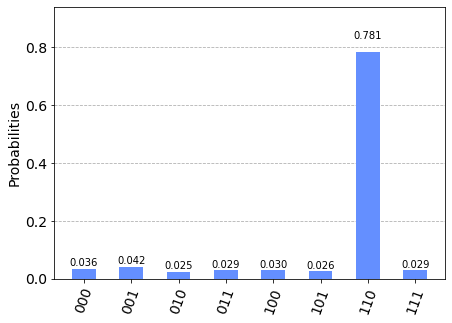

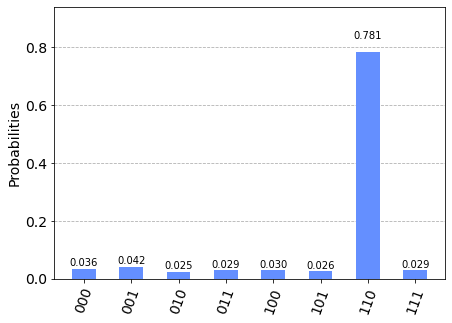

In [40]:
# p438 (p459 PDF)

# Run on the qasm simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the backend
job = execute(qc, backend, shots=1024)

# Extract the results
results = job.result()
counts = results.get_counts(qc)

# Print and plot results
print(counts)
plot_histogram(counts)


### Run Grover's algorithm on a quantum computer

In [45]:
# p439 (p460 PDF)

# Execute the circuit on the least busy quantum computer
from qiskit.providers.ibmq import least_busy

# backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (num_qubits) and
#                                    not x.configuration().simulator and x.status().operational==True))

backend = provider.get_backend('ibm_brisbane')
print("Set backend: ", backend)

# Launch the job watcher widget
%qiskit_job_watcher


Set backend:  ibm_brisbane


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [46]:
# p440 (p461 PDF)

# Execute the circuit on the backend
job = execute(qc, backend, shots=1024)

# Extract the results
results = job.result()
counts = results.get_counts(qc)

# Print and plot results
print(counts)
plot_histogram(counts)

# still contains errors. Tried imb_osaka and ibm_brisbane


TranspilerError: "Unable to map source basis {('t', 1), ('h', 1), ('x', 1), ('tdg', 1), ('swap', 2), ('measure', 1), ('barrier', 3), ('barrier', 127), ('cx', 2)} to target basis {'reset', 'snapshot', 'sx', 'measure', 'id', 'x', 'rz', 'ecr', 'barrier'} over library <qiskit.circuit.equivalence.EquivalenceLibrary object at 0x0000027DFDE56108>."

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table